In [89]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

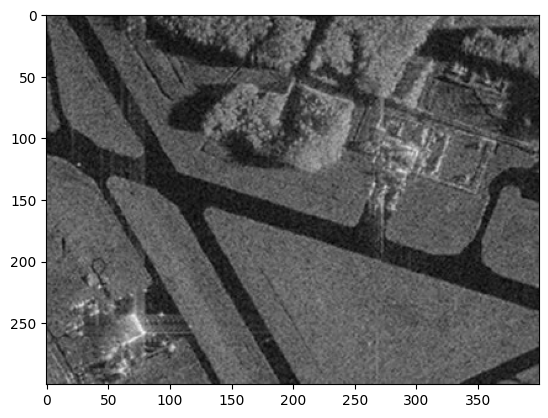

In [90]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(image_gray, cmap="gray")

In [91]:
import math
def homo_average(img, mask, point, T):
    av_val = img[mask > 0].sum() / np.count_nonzero(img[mask > 0])
                                                            
    if abs(av_val - img[point]) <= T:
        return True
    
    return False

In [92]:
def region_growing(image, seed_point,homo_fun,r, T):
    mask = np.zeros(image_gray.shape, np.uint8)
    mask[seed_point] = 1
    count = 1
    while count > 0:
        count = 0
        local_mask = np.zeros(image_gray.shape, np.uint8)
        for i in range(r,image.shape[0] - r):
            for j in range(r,image.shape[1] - r):
                if mask[i,j]==0 and mask[i - r:i + r, j-r: j+r].sum() > 0:
                    if homo_fun(image, mask, (i,j), T):
                        local_mask[i,j] = 1
        count = np.count_nonzero(local_mask)
        print(count)
        mask += local_mask
        
    return mask*255

35
85
135
185
233
277
333
383
430
479
532
583
632
681
736
619
559
587
606
616
604
599
589
575
550
561
533
522
506
492
470
453
442
420
405
389
367
345
330
307
290
272
258
247
235
219
210
193
153
82
79
70
66
64
59
55
46
41
32
23
53
0


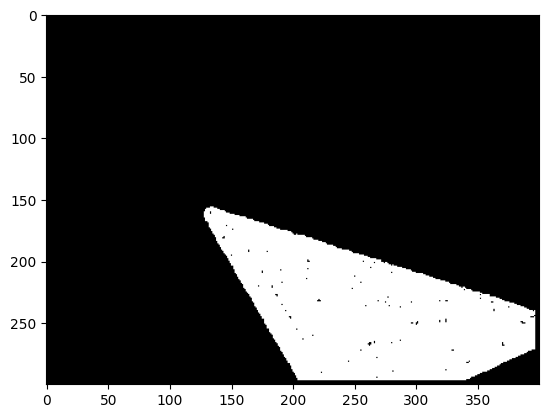

In [93]:
seed_point = (250,250)
mask = region_growing(image_gray,seed_point,homo_average, 3, 25)
plt.imshow(mask, cmap="gray")

In [94]:
z = image_gray.reshape((-1,3))

z = np.float32(z)

k1=2
criteria1 = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 7, 0.5)
k2=3
criteria2 = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.3)
k3=5
criteria3 = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.2)

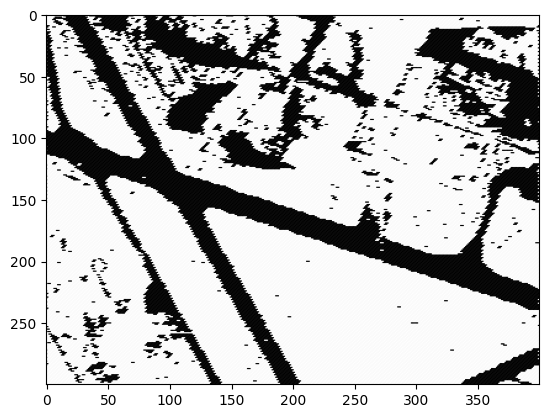

In [95]:
ret,label,center=cv2.kmeans(z,k1,None,criteria1,10,cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((image_gray.shape))
plt.imshow(res2, cmap="gray")

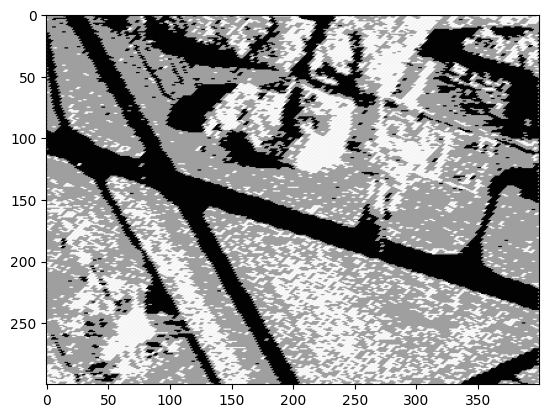

In [96]:
ret,label,center=cv2.kmeans(z,k2,None,criteria2,10,cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((image_gray.shape))
plt.imshow(res2, cmap="gray")

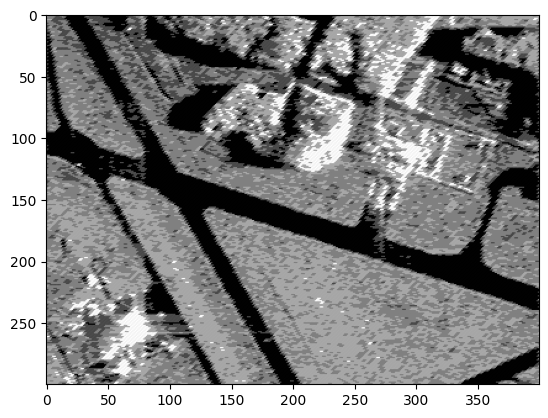

In [97]:
ret,label,center=cv2.kmeans(z,k3,None,criteria3,10,cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((image_gray.shape))
plt.imshow(res2, cmap="gray")

In [98]:
image = cv2.imread('palm_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

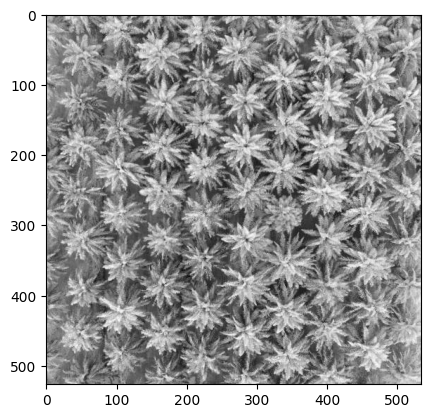

In [99]:
plt.imshow(image_gray, cmap="gray")

In [100]:
palm_gb = cv2.bilateralFilter(image_gray, d=11, sigmaColor=75, sigmaSpace=75)
ret, thresh = cv2.threshold(palm_gb,0,255, cv2.THRESH_BINARY +cv2.THRESH_OTSU)

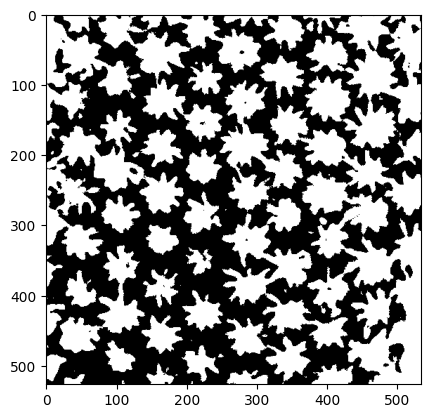

In [101]:
plt.imshow(thresh, cmap="gray")

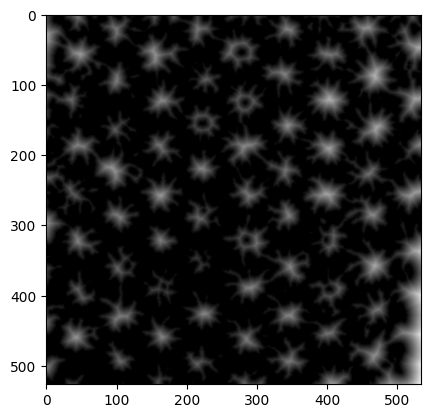

In [102]:
dist = cv2.distanceTransform(thresh, cv2.DIST_L2, 5) 
plt.imshow(dist, cmap="gray")

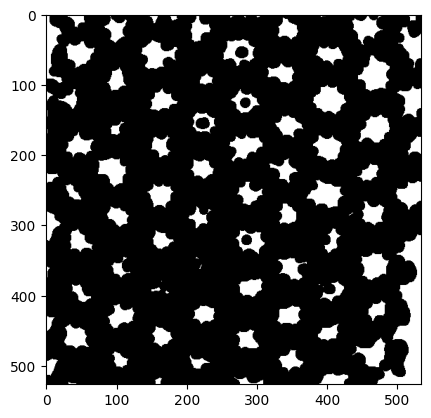

In [106]:
ret, sure_fg = cv2.threshold(dist, 0.2 * dist.max(), 255, cv2.THRESH_BINARY) 
plt.imshow(sure_fg, cmap="gray")

In [107]:
sure_fg = sure_fg.astype(np.uint8)

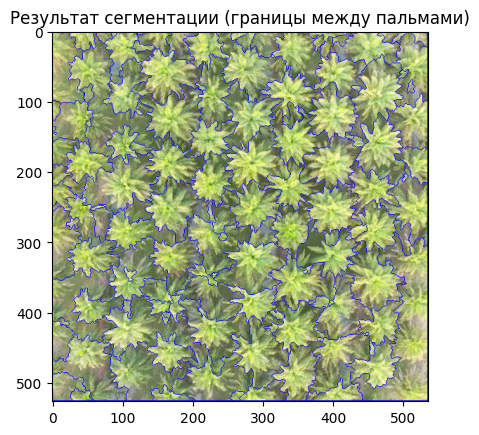

Количество пальм: 96


In [108]:
ret, markers = cv2.connectedComponents(sure_fg) 

markers = cv2.watershed(image, markers)

image[markers == -1] = [255, 0, 0]

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Результат сегментации (границы между пальмами)")
plt.show()

num_palms = len(np.unique(markers)) - 2

print("Количество пальм:", num_palms)